# Unit Simulation Experimental Notebook

In [1]:
from IPython.display import HTML
%matplotlib inline
# our simulator
import matplotlib.pyplot as plt
import battlesim as bsm

### Trial 1. 50 Clone Troopers vs. 80 B1 battledroids

Using Random AI selection for targets.

In [2]:
trial1 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial1.create_army([("b1 battledroid", 80), ("Clone Trooper", 20), ("Clone Trooper", 15)])
# battle droids near (0, 0), clones near (10, 10)
trial1.apply_position([
    dict(name="uniform", x_loc=-5., scale=2.),
    dict(name="gaussian", loc=0.),
    dict(name="gaussian", x_loc=4., y_loc=5.),
])
#init, rolling AIs now default to 'nearest'
trial1.set_decision_ai(["aggressive","hit_and_run","hit_and_run"])
# set terrain
t1_terra = bsm.Terrain((-10., 20., -10., 20.), res=.5, form="contour", dtype="perlin")
trial1.apply_terrain(t1_terra)

bsm.Battle(init=True, n_armies=3, simulated=False)

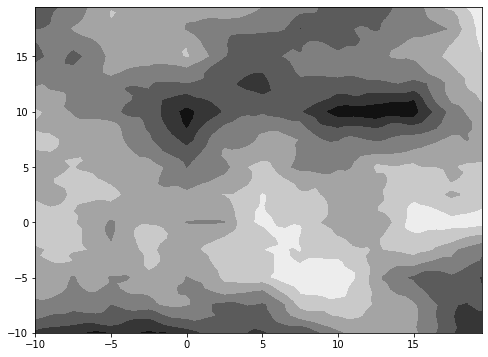

In [3]:
t1_terra.generate().plot()

In [4]:
# run a battle
F = trial1.simulate(max_step=1500)

In [5]:
F.memory_usage()

Index         57040
army           7130
allegiance     7130
alive          7130
hp            28520
armor         28520
x             28520
y             28520
dir_x         28520
dir_y         28520
dtype: int64

In [6]:
F.memory_usage().sum()/1000000

0.24955